# Import Libraries

In [40]:
import numpy as np
import pandas as pd

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import torch

# Create a dataframe

In [41]:
df = pd.DataFrame([{'X': 1, 'Y': 1},
                   {'X': 2, 'Y': 2},
                   {'X': 3, 'Y': 3},
                   {'X': 4, 'Y': 4},
                   {'X': 5, 'Y': 5}])
df

,X,Y
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [42]:
df['XY'] = df['X'] * df['Y']
df

,X,Y,XY
0,1,1,1
1,2,2,4
2,3,3,9
3,4,4,16
4,5,5,25


In [43]:
df['X^2'] = df['X']**2
df

,X,Y,XY,X^2
0,1,1,1,1
1,2,2,4,4
2,3,3,9,9
3,4,4,16,16
4,5,5,25,25


In [44]:
df['Y^2'] = df['Y']**2
df

,X,Y,XY,X^2,Y^2
0,1,1,1,1,1
1,2,2,4,4,4
2,3,3,9,9,9
3,4,4,16,16,16
4,5,5,25,25,25


In [45]:
df.loc['Sum'] = df.sum(axis=0)
df

,X,Y,XY,X^2,Y^2
0,1,1,1,1,1
1,2,2,4,4,4
2,3,3,9,9,9
3,4,4,16,16,16
4,5,5,25,25,25
Sum,15,15,55,55,55


In [46]:
r = ((len(df.iloc[0:-1, 0])*df.iloc[-1, 2]) - df.iloc[-1,0]*df.iloc[-1, 1]) / \
      np.sqrt((len(df.iloc[0:-1, 0])*df.iloc[-1, 3] - np.power(df.iloc[-1, 0], 2)) * \
              (len(df.iloc[:-1, 0])*df.iloc[-1, 4]-np.power(df.iloc[-1, 1], 2)))
print("r value: ", r)

r value:  1.0


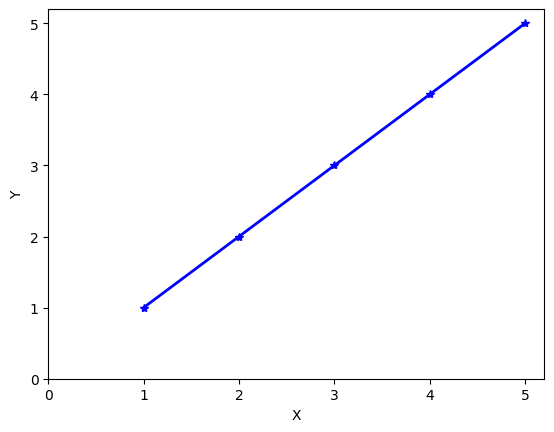

In [47]:
import matplotlib.pyplot as plt
plt.plot(df.iloc[0:-1, 0], df.iloc[0:-1, 1], c="Blue", marker="*", linewidth=2)
plt.plot()
# plt.xticks([1, 2, 3, 4, 5])
# plt.yticks([1, 2, 3, 4, 5])
plt.xticks(np.arange(0, 6))
plt.yticks(np.arange(0, 6))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

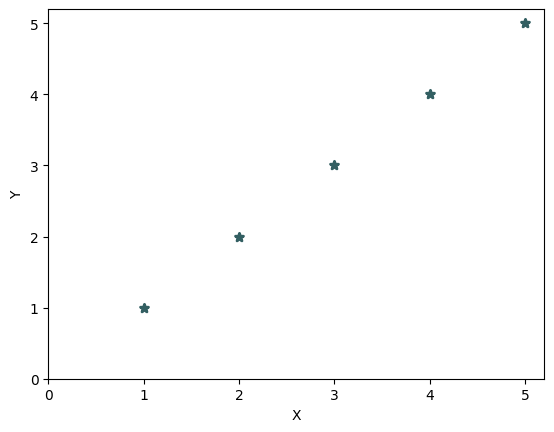

In [48]:
plt.scatter(df.iloc[0:-1, 0], df.iloc[0:-1, 1], c="#335f62", marker="*", linewidth=2)
plt.xticks(np.arange(0, 6))
plt.yticks(np.arange(0, 6))
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

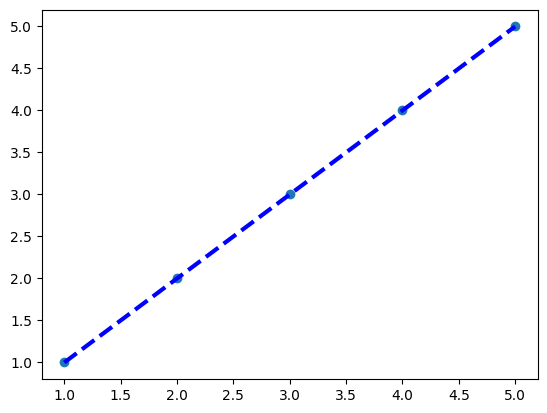

In [49]:
#1. Define dataset
X = df.iloc[0:-1, 0]
Y = df.iloc[0:-1, 1]

#2. Create a scatter plot
plt.scatter(X, Y)

#3. Calcuate an equation for a trendline
z = np.polyfit(X, Y, 1)
t = np.poly1d(z)

#4. Add a trendline
plt.plot(X, t(X), c="Blue", linewidth=3, linestyle="--")

# PyTorch Demo

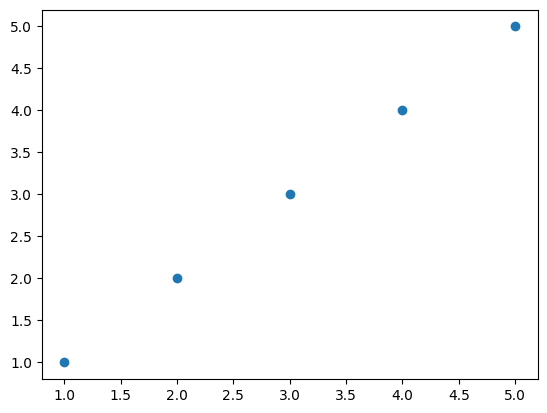

In [50]:
X = torch.LongTensor([[1],
                      [2],
                      [3],
                      [4],
                      [5]]) #2D X data. Its shape is 5X1
Y = torch.LongTensor([[1],
                      [2],
                      [3],
                      [4],
                      [5]]) #2D X data. Its shape is 5X1
plt.scatter(X, Y)

In [51]:
import torch
import torch.optim as optim #This library is to use an optimizer

#Step 1: Define the dataset
X = torch.LongTensor([[1],
                      [2],
                      [3],
                      [4],
                      [5]]) #2D X data. Its shape is 5X1
Y = torch.LongTensor([[1],
                      [2],
                      [3],
                      [4],
                      [5]]) #2D X data. Its shape is 5X1

#Step 2: Define W and b and initialize them with 0
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

#Step 3: Optimizer setting
"""
Optimizer: Optimization is the process of adjusting model parameters (W and b)
to reduce model error in each training step (epochs)
"""
optimizer = optim.SGD([W, b], lr=1e-2)

#Step 4: Model training
for epoch in range(2001):
  hypothesis = W * X + b #This is our model to find the most optimized values of W and b
  cost = torch.mean((hypothesis - Y)**2)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  #Step 5: Display results
  if epoch % 100 == 0:
    print("Epoch {:4d} / {} W: {:.3f}, b: {:.3f} Cost: {:.6f}".
          format(epoch, epoch, W.item(), b.item(), cost.item()))

Epoch    0 / 0 W: 0.220, b: 0.060 Cost: 11.000000
Epoch  100 / 100 W: 0.949, b: 0.183 Cost: 0.006119
Epoch  200 / 200 W: 0.964, b: 0.130 Cost: 0.003108
Epoch  300 / 300 W: 0.974, b: 0.093 Cost: 0.001579
Epoch  400 / 400 W: 0.982, b: 0.066 Cost: 0.000802
Epoch  500 / 500 W: 0.987, b: 0.047 Cost: 0.000407
Epoch  600 / 600 W: 0.991, b: 0.034 Cost: 0.000207
Epoch  700 / 700 W: 0.993, b: 0.024 Cost: 0.000105
Epoch  800 / 800 W: 0.995, b: 0.017 Cost: 0.000053
Epoch  900 / 900 W: 0.997, b: 0.012 Cost: 0.000027
Epoch 1000 / 1000 W: 0.998, b: 0.009 Cost: 0.000014
Epoch 1100 / 1100 W: 0.998, b: 0.006 Cost: 0.000007
Epoch 1200 / 1200 W: 0.999, b: 0.004 Cost: 0.000004
Epoch 1300 / 1300 W: 0.999, b: 0.003 Cost: 0.000002
Epoch 1400 / 1400 W: 0.999, b: 0.002 Cost: 0.000001
Epoch 1500 / 1500 W: 1.000, b: 0.002 Cost: 0.000000
Epoch 1600 / 1600 W: 1.000, b: 0.001 Cost: 0.000000
Epoch 1700 / 1700 W: 1.000, b: 0.001 Cost: 0.000000
Epoch 1800 / 1800 W: 1.000, b: 0.001 Cost: 0.000000
Epoch 1900 / 1900 W: 1.

# TensorFlow (V1) Demo

In [52]:
#Step 1: Define the dataset
x = [1, 2, 3, 4, 5]
y = [1, 2, 3, 4, 5]

#Step 2: Define global variables
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#Step 3: Define a hypothesis
hypothesis = W * x + b

#Step 4: Define a loss (cost) function
cost = tf.reduce_mean(tf.square(hypothesis - y))

#Step 5: Define an optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

#Step 6: Model training
with tf.Session() as sess: #Open session for model training
  #Step 6-1: Initialize global variables
  sess.run(tf.global_variables_initializer())

  #Step 6-2: for loop to define epochs
  for epochs in range(5001):
    optim, cost_val, W_val, b_val = sess.run([optimizer, cost, W, b])

    if epochs % 100 == 0:
      print(epochs, cost_val, W_val, b_val)

0 15.430713 [1.669714] [0.8409635]
100 0.034497034 [0.87982386] [0.43387392]
200 0.017523397 [0.91434824] [0.30923003]
300 0.008901319 [0.9389544] [0.22039396]
400 0.004521577 [0.9564917] [0.15707882]
500 0.0022968128 [0.9689908] [0.11195295]
600 0.0011667062 [0.9778992] [0.0797909]
700 0.0005926475 [0.98424834] [0.05686842]
800 0.0003010459 [0.98877347] [0.04053118]
900 0.00015292122 [0.9919987] [0.02888734]
1000 7.7679615e-05 [0.9942973] [0.02058857]
1100 3.9458548e-05 [0.99593556] [0.01467386]
1200 2.0043626e-05 [0.9971032] [0.01045833]
1300 1.0181251e-05 [0.9979354] [0.00745382]
1400 5.1719494e-06 [0.99852854] [0.00531247]
1500 2.627066e-06 [0.99895126] [0.0037863]
1600 1.3345228e-06 [0.9992525] [0.00269865]
1700 6.780634e-07 [0.9994672] [0.0019235]
1800 3.444972e-07 [0.99962026] [0.00137102]
1900 1.750153e-07 [0.9997293] [0.0009773]
2000 8.8933454e-08 [0.99980694] [0.00069669]
2100 4.5210292e-08 [0.9998624] [0.00049672]
2200 2.2987555e-08 [0.99990195] [0.00035414]
2300 1.1692425e-

In [53]:
print("Cost: ", format(8.9244167e-13, 'f'))

Cost:  0.000000


In [54]:
print("Bias: ", format(1.9669587e-06, 'f'))

Bias:  0.000002


# ScitKit-Learn Library Demo

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [56]:
df = pd.DataFrame([{'X': 1, 'Y': 1},
                   {'X': 2, 'Y': 2},
                   {'X': 3, 'Y': 3},
                   {'X': 4, 'Y': 4},
                   {'X': 5, 'Y': 5}])
df

,X,Y
0,1,1
1,2,2
2,3,3
3,4,4
4,5,5


In [57]:
x = df["X"]
y = df["Y"]

In [58]:
lr = LinearRegression()
lr.fit(x.values.reshape(5, 1), y)

LinearRegression()

In [59]:
lr.predict([[7]])

array([7.])

In [60]:
#To check the weight value
lr.coef_

array([1.])

In [61]:
#To check the bias value
lr.intercept_

0.0

In [62]:
y_pred = lr.predict(x.values.reshape(5, 1))
print("MSE score: ", mean_squared_error(y, y_pred))

MSE score:  0.0


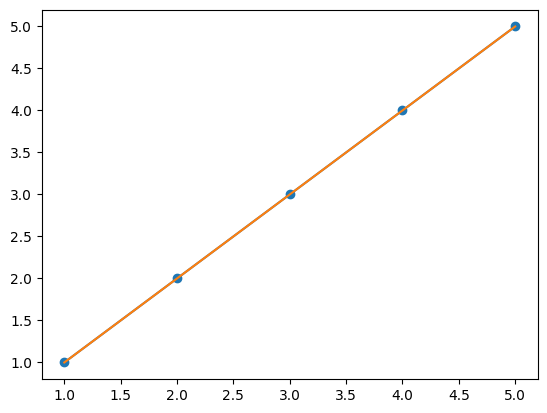

In [64]:
plt.plot(x, y, marker='o')
plt.plot(x, lr.predict(x.values.reshape(5,1)))
plt.show()